### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

**Read dataset**

In [2]:
df=pd.read_csv('Data_Science_Internship - Dump.csv')
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


**Drop unwanted features**

In [3]:
df.drop(['Unnamed: 0','Agent_id','lead_id','lost_reason','movein','source_city','source_country'],axis=1,inplace=True)

**Shape of the data**

In [4]:
df.shape

(46608, 9)

**Information about dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       46608 non-null  object
 1   budget       42908 non-null  object
 2   lease        44267 non-null  object
 3   source       46608 non-null  object
 4   utm_source   46608 non-null  object
 5   utm_medium   46608 non-null  object
 6   des_city     46608 non-null  object
 7   des_country  46608 non-null  object
 8   room_type    23061 non-null  object
dtypes: object(9)
memory usage: 3.2+ MB


### Data Cleaning

In [6]:
# Status value counts
df.status.value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [7]:
# Deleting unnecessary variable
df['status'] = df['status'].astype('category')
df['status'] = df['status'].cat.remove_categories(['OPPORTUNITY','CONTACTED','PROCESSING','IMPORTANT'])
df['status'] = df['status'].cat.reorder_categories(['LOST', 'WON'], ordered=True) 

In [8]:
df.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [9]:
# Columns present in the dataset
df.columns

Index(['status', 'budget', 'lease', 'source', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type'],
      dtype='object')

In [10]:
# NAN values present in the dataset
cols=['source','utm_source', 'utm_medium', 'des_city', 'des_country']
nan_={'9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':np.nan}
_nan='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'
for col in cols: 
    df[col]=df[col].apply(lambda x:nan_[x] if x==_nan else x)

In [11]:
df.head()

,status,budget,lease,source,utm_source,utm_medium,des_city,des_country,room_type
0,LOST,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
1,LOST,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
2,LOST,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
3,LOST,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
4,LOST,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN


In [12]:
df.isnull().sum()

status           291
budget          3700
lease           2341
source          5977
utm_source        61
utm_medium      3187
des_city        2537
des_country     2537
room_type      23547
dtype: int64

In [13]:
# Droping all null values
df.dropna(subset=['status', 'budget', 'lease', 'source', 'utm_source', 'utm_medium',
                  'des_city', 'des_country'],axis=0,inplace=True)

In [14]:
df.isnull().sum()

status             0
budget             0
lease              0
source             0
utm_source         0
utm_medium         0
des_city           0
des_country        0
room_type      15421
dtype: int64

In [15]:
# Checking rows after deleting null values
df.shape

(34323, 9)

In [16]:
df.status.value_counts()

LOST    31970
WON      2353
Name: status, dtype: int64

In [17]:
df.head()

,status,budget,lease,source,utm_source,utm_medium,des_city,des_country,room_type
2,LOST,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
3,LOST,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
5,LOST,120,semester-stay,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
6,LOST,0-0,0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
7,LOST,£181 - £240 Per Week,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place


**Cleaning Budget column**

In [18]:
budget=(df.budget.value_counts()/len(df))*100
budget

£60 - £120 Per week                                   22.870961
£121 - £180 Per Week                                  21.752178
0-0                                                   12.647496
£181 - £240 Per Week                                   5.177286
100                                                    3.726364
                                                        ...    
0-Brunel University                                    0.002913
600-750pm                                              0.002913
1400-1500                                              0.002913
0-around 300 pounds per week. it can be considered     0.002913
0-500 PCM                                              0.002913
Name: budget, Length: 1435, dtype: float64

In [19]:
budget=budget[budget<1]
budget

160                                                   0.984762
180                                                   0.961454
110                                                   0.949800
140                                                   0.894444
250                                                   0.812866
                                                        ...   
0-Brunel University                                   0.002913
600-750pm                                             0.002913
1400-1500                                             0.002913
0-around 300 pounds per week. it can be considered    0.002913
0-500 PCM                                             0.002913
Name: budget, Length: 1424, dtype: float64

In [20]:
# Removing categories which are having value less than 1%
budget_cat=list(budget.keys())
df['budget'] = df['budget'].astype('category')
df['budget'] = df['budget'].cat.remove_categories([i for i in budget_cat])
df['budget'] = df['budget'].cat.reorder_categories(['£60 - £120 Per week','£121 - £180 Per Week','0-0','£181 - £240 Per Week',
                                                     '100','150','£241 - £300 Per week','> 300£ Per Week','200','120','130'], ordered=True)

In [21]:
df['budget'].value_counts()

£60 - £120 Per week     7850
£121 - £180 Per Week    7466
0-0                     4341
£181 - £240 Per Week    1777
100                     1279
150                      882
£241 - £300 Per week     607
> 300£ Per Week          601
200                      560
120                      477
130                      350
Name: budget, dtype: int64

In [22]:
df['budget']=df['budget'].str.replace('[^0-9-]','',regex=True)
df['budget']=df['budget'].replace('0-0','0')
df['budget']=df['budget'].replace('60-120','90')
df['budget']=df['budget'].replace('121-180','151')
df['budget']=df['budget'].replace('181-240','211')
df['budget']=df['budget'].replace('241-300','271')

df['budget'].value_counts()

90     7850
151    7466
0      4341
211    1777
100    1279
150     882
271     607
300     601
200     560
120     477
130     350
Name: budget, dtype: int64

**Cleaning Lease column**

In [23]:
lease=(df['lease'].value_counts()/len(df))*100
lease

Full Year Course Stay 40 - 44 weeks           26.891589
Complete Education Year Stay 50 - 52 weeks    15.371617
0                                             13.364216
51                                             8.140314
Semester Stay 20 - 24 weeks                    6.462139
                                                ...    
30 weeks                                       0.002913
1 year stay.                                   0.002913
Stay 50 - 52 weeks                             0.002913
207                                            0.002913
33 weeks                                       0.002913
Name: lease, Length: 244, dtype: float64

In [24]:
lease=lease[lease<1]
lease

44 weeks              0.667191
other                 0.413717
45                    0.372928
43                    0.329225
1                     0.238907
                        ...   
30 weeks              0.002913
1 year stay.          0.002913
Stay 50 - 52 weeks    0.002913
207                   0.002913
33 weeks              0.002913
Name: lease, Length: 230, dtype: float64

In [25]:
# Removing categories which are having value less than 1%
lease_cat=list(lease.keys())
df['lease'] = df['lease'].astype('category')
df['lease'] = df['lease'].cat.remove_categories([i for i in lease_cat])
df['lease'] = df['lease'].cat.reorder_categories(['Full Year Course Stay 40 - 44 weeks',
                                                  'Complete Education Year Stay 50 - 52 weeks', 
                                                  '0', '51','Semester Stay 20 - 24 weeks', 'Summer/Short Stay 8 - 12 weeks',
                                                   'lease', 'full-course-stay', 'full-year-stay', 'Other', '44',
                                                   '51 weeks', 'semester-stay', 'short-stay'], ordered=True)

**Cleaning other columns**

In [26]:
# Removing categories which are having value less than 1%
columns=['source', 'utm_source', 'utm_medium','des_city', 'des_country',]
for col in columns:
    cat=(df[col].value_counts()/len(df))*100
    cat_rem=cat[cat<1]
    cat_not_rem=cat[cat>1]
    list_not_rem_cat=list(cat_not_rem.keys())
    list_rem_cat=list(cat_rem.keys())
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.remove_categories([i for i in list_rem_cat])
    df[col] = df[col].cat.reorder_categories([i for i in list_not_rem_cat],ordered=True)

In [27]:
# Filling null value of room_type column with 'other'
df.room_type.fillna('other',inplace=True)
df.room_type.value_counts()

other           15421
Ensuite          9980
Studio           5353
Entire Place     3566
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [28]:
# Used Mode to fill null value of budget column
df['budget'].fillna(df['budget'].mode()[0],inplace=True)

In [29]:
# After removing all null values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

status         0
budget         0
lease          0
source         0
utm_source     0
utm_medium     0
des_city       0
des_country    0
room_type      0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25967 entries, 2 to 46605
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   status       25967 non-null  category
 1   budget       25967 non-null  object  
 2   lease        25967 non-null  category
 3   source       25967 non-null  category
 4   utm_source   25967 non-null  category
 5   utm_medium   25967 non-null  category
 6   des_city     25967 non-null  category
 7   des_country  25967 non-null  category
 8   room_type    25967 non-null  object  
dtypes: category(7), object(2)
memory usage: 788.7+ KB


In [31]:
df.shape

(25967, 9)

### Data Preprocessing

**Treating Imbalance data**

In [32]:
X = df.drop(["status"],axis=1)
y = df["status"]

**Converting class label**

**WON : 1**

**LOST : 0**

In [33]:
y=y.map({'WON':1,'LOST':0})
y.value_counts()

0    24147
1     1820
Name: status, dtype: int64

S:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

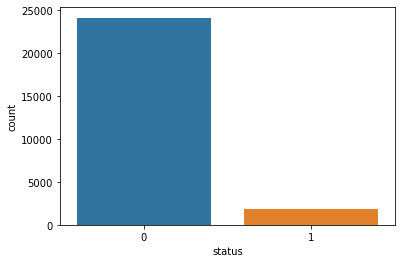

In [34]:
sns.countplot(y)

**Label Encoding to all categorical features**

In [35]:
label_en = LabelEncoder()
for col in list(X.columns):
    X[col]=label_en.fit_transform(X[col])

In [36]:
# Get the WON and LOST from dataset 
won = df[df['status']=='WON']
lost = df[df['status']=='LOST']

print(won.shape,lost.shape)

(1820, 9) (24147, 9)


In [37]:
# Used SMOTETomek to overcome imbalance data
from imblearn.combine import SMOTETomek
from collections import Counter
smt=SMOTETomek(random_state=42)
X_train,y_train=smt.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({0: 24147, 1: 1820})
The number of classes after fit Counter({0: 24137, 1: 24137})


**Spliting the data into Training & Testing**

In [38]:
from sklearn.model_selection import train_test_split
X_train_ns, X_test, y_train_ns, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)
print(X_train.shape,y_train.shape)
print()
print(X_test.shape,y_test.shape)

(48274, 8) (48274,)

(9655, 8) (9655,)


In [39]:
y_train_ns.value_counts()

1    19310
0    19309
Name: status, dtype: int64

**Feature Selection**


[0.10970621 0.20661391 0.06871542 0.04584631 0.03733881 0.43407772
 0.0083721  0.08932952]



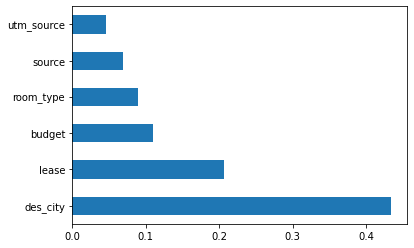

In [40]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print()
print(model.feature_importances_)
print()
feat_importances = pd.Series(model.feature_importances_, index=X_train_ns.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [41]:
# Chi2 Test
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
print(f_p_values)
print()
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

(array([3.09596645e+01, 2.91375436e+03, 8.07671095e+02, 8.82329656e-01,
       8.04456087e+02, 5.16997990e+02, 1.00720023e+00, 1.11129255e+00]), array([2.63446956e-008, 0.00000000e+000, 1.15940964e-177, 3.47564399e-001,
       5.79736933e-177, 1.90402483e-114, 3.15574512e-001, 2.91801150e-001]))



utm_source      3.475644e-01
utm_medium     5.797369e-177
source         1.159410e-177
room_type       2.918012e-01
lease           0.000000e+00
des_country     3.155745e-01
des_city       1.904025e-114
budget          2.634470e-08
dtype: float64

In [42]:
# Information gain
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
print()
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

des_city       0.059040
lease          0.040874
source         0.025828
room_type      0.013532
des_country    0.012496
utm_source     0.012322
utm_medium     0.009706
budget         0.006324
dtype: float64

In [43]:
# Select K best features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
print(X_train.columns[sel_five_cols.get_support()])

Index(['lease', 'source', 'utm_source', 'utm_medium', 'des_city', 'room_type'], dtype='object')


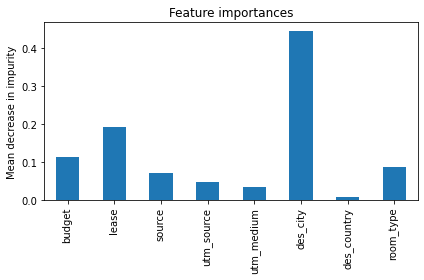

In [44]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=X_train_ns.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Selecting best features observed from different selection techniques**

In [45]:
X_train_ns=X_train_ns[['des_city','source','utm_source','room_type','lease','budget']]
X_test=X_test[['des_city','source','utm_source','room_type','lease','budget']]
print(X_train_ns.shape,y_train_ns.shape)
print()
print(X_test.shape,y_test.shape)

(38619, 6) (38619,)

(9655, 6) (9655,)


### Model Building

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [47]:
# Prediction
y_pred=log_reg.predict(X_test)

In [48]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.5859140341791818

              precision    recall  f1-score   support

           0       0.52      0.60      0.56      4186
           1       0.65      0.58      0.61      5469

    accuracy                           0.59      9655
   macro avg       0.59      0.59      0.58      9655
weighted avg       0.59      0.59      0.59      9655



In [49]:
# Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train_ns,y_train_ns)

SVC(kernel='poly')

In [50]:
# Prediction
y_pred=svc.predict(X_test)

In [51]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.6220611082340756

              precision    recall  f1-score   support

           0       0.50      0.66      0.57      3669
           1       0.74      0.60      0.66      5986

    accuracy                           0.62      9655
   macro avg       0.62      0.63      0.62      9655
weighted avg       0.65      0.62      0.63      9655



In [52]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [53]:
# Prediction
y_pred=model_rf.predict(X_test)

In [54]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7766960124287934

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4190
           1       0.84      0.74      0.79      5465

    accuracy                           0.78      9655
   macro avg       0.78      0.78      0.78      9655
weighted avg       0.79      0.78      0.78      9655



In [55]:
# XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
model_xgb = XGBClassifier()
model_xgb.fit(X_train_ns, y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
# Prediction
y_pred=model_xgb.predict(X_test)

In [57]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7648886587260487

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      4180
           1       0.83      0.73      0.78      5475

    accuracy                           0.76      9655
   macro avg       0.76      0.77      0.76      9655
weighted avg       0.77      0.76      0.77      9655



In [58]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_ns, y_train_ns)

GaussianNB()

In [59]:
# Prediction
y_pred=gnb.predict(X_test)

In [60]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.6039357845675816

              precision    recall  f1-score   support

           0       0.44      0.65      0.53      3242
           1       0.77      0.58      0.66      6413

    accuracy                           0.60      9655
   macro avg       0.60      0.62      0.59      9655
weighted avg       0.66      0.60      0.61      9655



In [61]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [62]:
# Prediction
y_pred = knnclassifier.predict(X_test)

In [63]:
# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7361988606939409

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      4735
           1       0.75      0.73      0.74      4920

    accuracy                           0.74      9655
   macro avg       0.74      0.74      0.74      9655
weighted avg       0.74      0.74      0.74      9655



### Model Selection

In [64]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [65]:
# KNN
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
model =KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model, X_train_ns, y_train_ns, cv=cv, scoring ='accuracy')
print(np.mean(scores))

0.731065270345436


In [66]:
# Logistic Regresion
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
model =LogisticRegression()
scores=cross_val_score(model, X_train_ns, y_train_ns, cv=cv, scoring ='accuracy')
print(np.mean(scores))

0.577513700791795


In [67]:
# Support Vector Classifier
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
model =SVC(kernel='poly')
scores=cross_val_score(model, X_train_ns, y_train_ns, cv=cv, scoring ='accuracy')
print(np.mean(scores))

0.6347655281630334


In [68]:
# Random Forest Classifier
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
model =RandomForestClassifier()
scores=cross_val_score(model, X_train_ns, y_train_ns, cv=cv, scoring ='accuracy')
print(np.mean(scores))

0.7663070774670981


In [69]:
# XGBoost Classifier
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
model =XGBClassifier()
scores=cross_val_score(model, X_train_ns, y_train_ns, cv=cv, scoring ='accuracy')
print(np.mean(scores))

0.7564675020397443


### Hyperparameter Tunning

**Logistic Regression**

In [70]:
from sklearn.model_selection import GridSearchCV

parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300,400,500]}
lr_=LogisticRegression()
lr=GridSearchCV(lr_,param_grid=parameter,scoring='accuracy',cv=10)

lr.fit(X_train_ns,y_train_ns)

print(lr.best_params_)
print()
print(lr.best_score_)

# Prediction
y_pred=lr.predict(X_test)

# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

S:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1100 fits failed out of a total of 1650.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "S:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "S:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "S:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

0.577720666275819
Accuracy :  0.5859140341791818

              precision    recall  f1-score   support

           0       0.52      0.60      0.56      4186
           1       0.65      0.58      0.61      5469

    accuracy                           0.59      9655
   macro avg       0.59      0.59      0.58      9655
weighted avg       0.59      0.59      0.59      9655



**Random Forest Classifier**

In [71]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200,300,400,500]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
# fit the randomized model
rf_randomcv.fit(X_train_ns,y_train_ns)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100, verbose=2)

In [72]:
rf_randomcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

In [73]:
best_random_grid=rf_randomcv.best_estimator_

In [74]:
y_pred=best_random_grid.predict(X_test)

# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7763852925945106

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4165
           1       0.85      0.74      0.79      5490

    accuracy                           0.78      9655
   macro avg       0.78      0.78      0.78      9655
weighted avg       0.79      0.78      0.78      9655



**XGBoost Classifier**

In [75]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fit the randomized model
random_search.fit(X_train_ns,y_train_ns)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [76]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [78]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)

In [79]:
classifier.fit(X_train_ns,y_train_ns)

y_pred=classifier.predict(X_test)

# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7557742102537546

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      4122
           1       0.83      0.72      0.77      5533

    accuracy                           0.76      9655
   macro avg       0.76      0.76      0.75      9655
weighted avg       0.77      0.76      0.76      9655



**KNN**

In [80]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 21)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1)

clf.fit(X_train_ns, y_train_ns)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [81]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set
{'n_neighbors': 13, 'p': 1}
KNeighborsClassifier(n_neighbors=13, p=1)

Score on Test Data:  0.7468669083376489


In [82]:
y_pred=clf.predict(X_test)

# Evaluation
score=accuracy_score(y_pred,y_test)
print('Accuracy : ',score)
print()
print(classification_report(y_pred,y_test))

Accuracy :  0.7468669083376489

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      4280
           1       0.80      0.72      0.76      5375

    accuracy                           0.75      9655
   macro avg       0.75      0.75      0.75      9655
weighted avg       0.75      0.75      0.75      9655



### Final Model - Random Forest Classifier

In [86]:
# Model Training
rf_classifier = RandomForestClassifier(n_estimators = 300,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = 'log2',
                                       max_depth = 30,
                                       criterion = 'entropy')
rf_classifier = rf_classifier.fit(X_train_ns, y_train_ns)

# Prediction
prediction = rf_classifier.predict(X_test)

# Evaluation
score=accuracy_score(prediction,y_test)
print('Accuracy : ',score)
print()
print(classification_report(prediction,y_test))

Accuracy :  0.7763852925945106

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4175
           1       0.84      0.74      0.79      5480

    accuracy                           0.78      9655
   macro avg       0.78      0.78      0.78      9655
weighted avg       0.79      0.78      0.78      9655



In [85]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

dif.head()

,Actual,Predicted
8873,0,0
1764,0,1
42614,1,1
6034,0,0
47747,1,1


### Serialization

In [87]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier.pkl','wb'))